# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Install citipy right on jupyter notebook
# import sys
# !{sys.executable} -m pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=811552cac8f2c72b64f643461f84d0841c91b8502a828aec55f2249c77bdb517
  Stored in directory: c:\users\16308\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat, lng, and cities
lat_lngs = []
cities = []

# Make a sets of random lat and lng ranges
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Check for the closest city for each lat and lng
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config URL Path and Units.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Add URL and API key, including units to the final query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# lists that will hold reponse info
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and perform requests
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # Wil get 50 cities at a time and then wait 5 seconds before doing other 50 cities
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | City Name: {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City Not Found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | City Name: champerico
Processing Record 2 of Set 1 | City Name: hilo
Processing Record 3 of Set 1 | City Name: yellowknife
Processing Record 4 of Set 1 | City Name: kapaa
Processing Record 5 of Set 1 | City Name: bluff
Processing Record 6 of Set 1 | City Name: port blair
Processing Record 7 of Set 1 | City Name: gagino
Processing Record 8 of Set 1 | City Name: kodiak
Processing Record 9 of Set 1 | City Name: carnarvon
Processing Record 10 of Set 1 | City Name: ushuaia
Processing Record 11 of Set 1 | City Name: pevek
Processing Record 12 of Set 1 | City Name: aklavik
Processing Record 13 of Set 1 | City Name: kavieng
Processing Record 14 of Set 1 | City Name: portland
Processing Record 15 of Set 1 | City Name: upernavik
Processing Record 16 of Set 1 | City Name: boa vista
Processing Record 17 of Set 1 | City Name: bababe
City Not Found. Skipping...
Processing Record 18 of Set 1 | City Na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert data into dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
})

# Drop cities that weren't found
city_weather_df = city_weather_df.dropna(how="any")

# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DF
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,champerico,70.0,GT,1.665344e+09,72.0,14.3000,-91.9167,90.14,4.14
1,hilo,20.0,US,1.665344e+09,67.0,19.7297,-155.0900,87.28,5.01
2,yellowknife,75.0,CA,1.665344e+09,87.0,62.4560,-114.3525,46.92,15.01
3,kapaa,0.0,US,1.665344e+09,67.0,22.0752,-159.3190,81.10,1.01
4,bluff,100.0,NZ,1.665344e+09,75.0,-46.6000,168.3333,50.14,11.27


In [8]:
# Count data to confirm all rows have the same value
print(city_weather_df.count())

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Latitude      565
Longitude     565
Max Temp      565
Wind Speed    565
dtype: int64


In [17]:
# Count data to confirm all rows have the same value V2
weather_df.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,57.295575,1.665344e+09,68.348673,18.861818,18.241194,63.715735,8.678265
std,41.145212,9.413412e+01,22.368620,32.864444,89.688406,18.240414,6.314951
min,0.000000,1.665343e+09,7.000000,-54.800000,-175.200000,0.660000,0.000000
25%,9.000000,1.665344e+09,55.000000,-8.419200,-59.516700,52.020000,4.250000
50%,75.000000,1.665344e+09,74.000000,22.075200,23.450000,67.330000,7.050000
75%,100.000000,1.665344e+09,86.000000,45.958900,99.184400,77.520000,11.500000
max,100.000000,1.665344e+09,100.000000,78.218600,178.416700,104.810000,48.340000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#check if any cities with Humidity > 100% 
weather_df["Humidity"].describe()

count    565.000000
mean      68.348673
std       22.368620
min        7.000000
25%       55.000000
50%       74.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [12]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_df[(weather_df["Humidity"] > 100)].index
high_humidity

Int64Index([], dtype='int64')

In [13]:
# Make a new Dataframe that doesn't contain high humidity
updated_city_data = weather_df.drop(high_humidity, inplace=False)
updated_city_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,champerico,70.0,GT,1.665344e+09,72.0,14.3000,-91.9167,90.14,4.14
1,hilo,20.0,US,1.665344e+09,67.0,19.7297,-155.0900,87.28,5.01
2,yellowknife,75.0,CA,1.665344e+09,87.0,62.4560,-114.3525,46.92,15.01
3,kapaa,0.0,US,1.665344e+09,67.0,22.0752,-159.3190,81.10,1.01
4,bluff,100.0,NZ,1.665344e+09,75.0,-46.6000,168.3333,50.14,11.27


In [15]:
# Export the updated city data into a new csv called updated_city_data.csv
updated_city_data.to_csv("output_data/updated_city_data.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

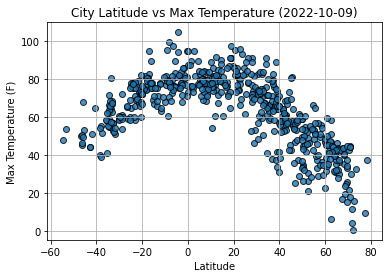

In [47]:
date_of_analysis = datetime.date(datetime.now())

# Create a scatter plot for latitude vs temperature.
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature ({date_of_analysis})")
plt.grid()

# Save the figure
plt.savefig("Images/latitude_vs_max_temp.png", bbox_inches="tight")
plt.show()

The latitude vs temperature (F) plot shown above, which has the data from all randomly selected cities, has the highest Latitude towards to the middle of the chart, of 0-20 degrees. And as the latitude increases or decreases from anywhere other than 0-20 degrees, the temprature seems to go down.

## Latitude vs. Humidity Plot

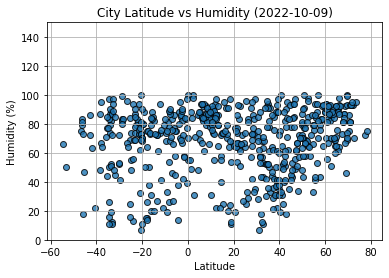

In [27]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({date_of_analysis})')
plt.ylim(0, 150)
plt.grid()
plt.savefig("Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

From the Latitude vs Humidity plot above, the data from all the cities shows that Humidity is pretty spread out from the data points, however, most of the Humidity is above 60%, with the highest Percentage of Humidity occuring in Latitudes 60-80.

## Latitude vs. Cloudiness Plot

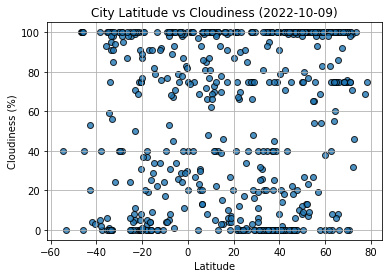

In [28]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({date_of_analysis})')
plt.grid()
plt.savefig("Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

Unlike the previous two figures, the City Latitude vs Cloudiness plot chart is all over the place, without a clear indication of relationships between Cloudiness Percentage or Latitude. However, we can visually see that more plots seem to be at either 0% Cloudiness, or 100% Cloudiness, compared to plots towards the middle.

## Latitude vs. Wind Speed Plot

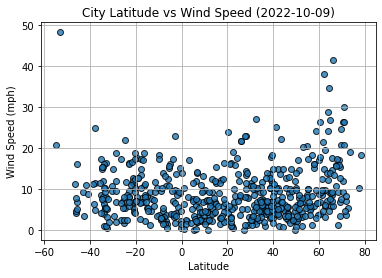

In [29]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({date_of_analysis})')
plt.grid()
plt.savefig("Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [45]:
# Function for linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r value
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

# Create Dataframes for Northern and Southern Hemispheres
northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.826737022769476


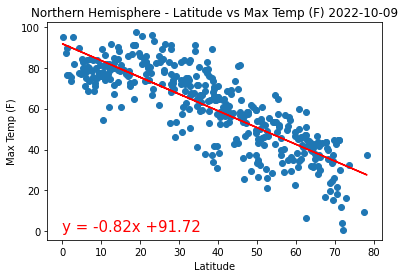

In [46]:
# Create a scatter plot for Max Temp vs. Latitude for Northern Hemisphere
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.588560309450373
The correlation between both factors is 0.77


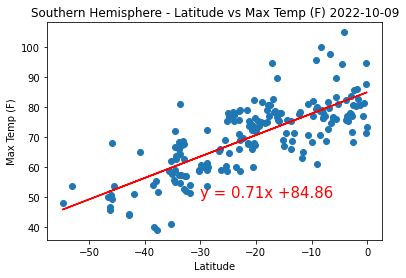

In [38]:
# Create a scatter plot for Max Temp vs. Latitude for Southern Hemisphere
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012743280859688094
The correlation between both factors is 0.11


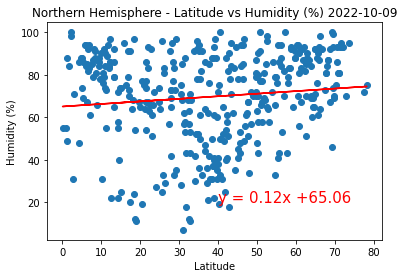

In [39]:
# Create a scatter plot for Humidity (%) vs. Latitude in Northern Hemisphere
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012743280859688094
The correlation between both factors is 0.11


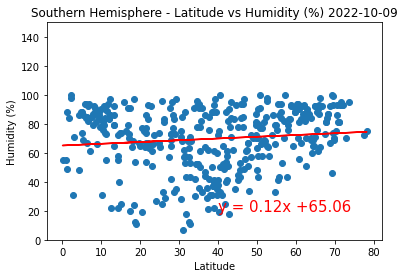

In [40]:
# Create a scatter plot for Humidity (%) vs. Latitude in Southern Hemisphere
x_values1 = southern_hemisphere_weather_df['Latitude']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01653876190837741
The correlation between both factors is 0.13


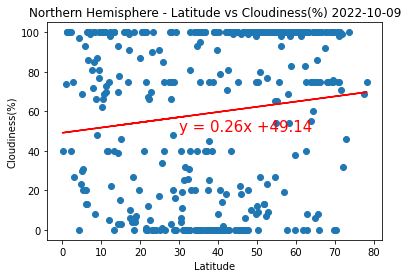

In [41]:
# Create a scatter plot for Cloudiness (%) vs. Latitude in Northern Hemisphere
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0034189422786739167
The correlation between both factors is 0.06


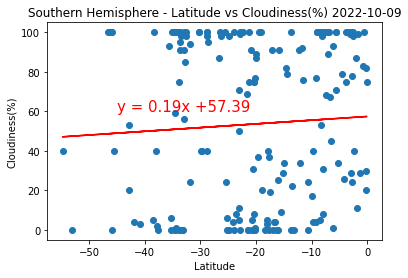

In [42]:
# Create a scatter plot for Cloudiness (%) vs. Latitude in Southern Hemisphere
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1001631663232273
The correlation between both factors is 0.32


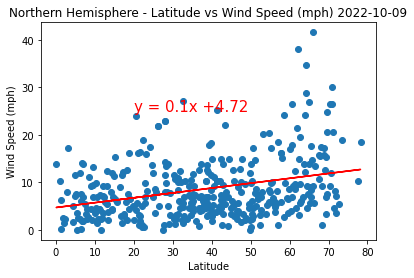

In [43]:
# Create a scatter plot for Wind Speed (mph) vs. Latitude in Northern Hemisphere
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03934372358884718
The correlation between both factors is -0.2


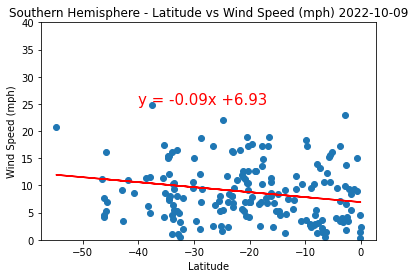

In [44]:
# Create a scatter plot for Wind Speed (mph) vs. Latitude in Southern Hemisphere
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)